# **Used Cars Price Prediction**


## **Problem Definition**

### **The Context:**

- Why is this problem important to solve?

### **The objective:**

- What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?


### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)


### **Loading libraries**


In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings

warnings.filterwarnings("ignore")

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# file_path = '/content/drive/MyDrive/00.capstone/ML/used_cars.csv'
file_path = "used_cars.csv"

# Load the dataset
df = pd.read_csv(file_path)

df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


## Data Overview


- Observations
- Sanity checks


In [4]:
# Assuming 'df' is your DataFrame
df = df.drop("S.No.", axis=1)

# Display the first few rows to verify the column has been dropped
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


In [6]:
df.describe(include="all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
unique,2041,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN
freq,55,949,NaN,NaN,3852,5204,5952,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000


In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64


In [8]:
# List of columns to be converted to categorical
# You might want to exclude numerical columns that are accidentally typed as 'object'
categorical_columns = df.select_dtypes(include=["object"]).columns

# Convert columns to categorical
for column in categorical_columns:
    df[column] = df[column].astype("category")

# Check datatypes to confirm the conversion
print(df.dtypes)

Name                 category
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
New_price             float64
Price                 float64
dtype: object


In [9]:
# Convert 'Mileage' to string type first, then apply the extraction
df["Mileage"] = df["Mileage"].astype(str).str.extract("(\d+\.\d+)").astype(float)
# Checking the data type of 'Mileage', 'Engine', and 'Power'
print(df[["Mileage", "Engine", "Power"]].dtypes)
# Handling potential mixed types or after unsuccessful conversion attempts
df["Mileage"] = pd.to_numeric(df["Mileage"], errors="coerce")

Mileage    float64
Engine     float64
Power      float64
dtype: object


In [10]:
# Display summary statistics for 'Kilometers_Driven'
print(df["Kilometers_Driven"].describe())

count    7.253000e+03
mean     5.869906e+04
std      8.442772e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.341600e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64


In [11]:
# Find unusually high values
print(df[df["Kilometers_Driven"] > 1e6])

                           Name Location  Year  Kilometers_Driven Fuel_Type  \
2328  BMW X5 xDrive 30d M Sport  Chennai  2017            6500000    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  New_price  Price  
2328    Automatic      First    15.97  2993.0  258.0    5.0        NaN   65.0  


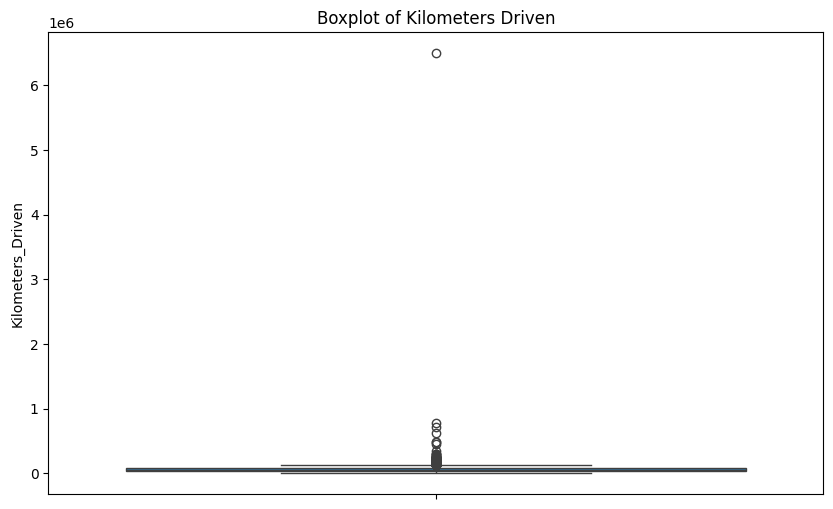

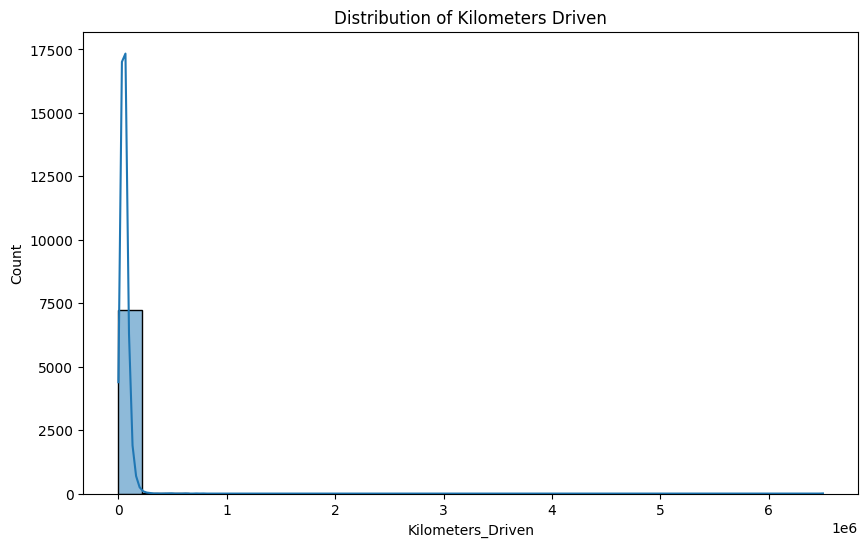

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df["Kilometers_Driven"])
plt.title("Boxplot of Kilometers Driven")
plt.show()

# Histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Kilometers_Driven"], bins=30, kde=True)
plt.title("Distribution of Kilometers Driven")
plt.show()

In [13]:
# Remove rows where 'Kilometers_Driven' is greater than 1e6
df_filtered = df[df["Kilometers_Driven"] <= 1e6]

# Display the shape of the original and filtered DataFrames to see how many rows were removed
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)

Original DataFrame shape: (7253, 13)
Filtered DataFrame shape: (7252, 13)


In [14]:
df = df_filtered

## **Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.


**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic


## **Univariate Analysis**


**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def analyze_numerical_variable(df, column_name):
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # Histogram with mean value
    sns.histplot(df[column_name], kde=True, ax=axs[0], color="skyblue")
    axs[0].axvline(df[column_name].mean(), color="red", linestyle="--")
    axs[0].set_title(f"Histogram of {column_name} (mean={df[column_name].mean():.2f})")

    # Boxplot
    sns.boxplot(x=df[column_name], ax=axs[1], color="lightgreen")
    axs[1].set_title(f"Boxplot of {column_name}")

    plt.tight_layout()
    plt.show()

In [16]:
def analyze_categorical_variable(df, column_name):
    # Calculate the percentage of each category
    percentage = df[column_name].value_counts(normalize=True) * 100

    # Create a count plot
    plt.figure(figsize=(10, 6))
    order = percentage.index
    sns.countplot(data=df, x=column_name, order=order, palette="viridis")

    # Add percentage text above each bar
    for i in range(percentage.shape[0]):
        plt.text(i, df[column_name].value_counts()[i], f"{percentage[i]:.2f}%", ha="center", va="bottom")

    plt.title(f"Count Plot of {column_name} (Percentages)")
    plt.xticks(rotation=45)
    plt.show()

In [17]:
def perform_univariate_analysis(df):
    # Identify numerical and categorical columns
    numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
    categorical_columns = df.select_dtypes(include=["object", "category", "bool"]).columns

    # Perform univariate analysis for numerical variables
    print("Univariate Analysis for Numerical Variables")
    for column in numerical_columns:
        analyze_numerical_variable(df, column)

    # Perform univariate analysis for categorical variables
    print("\nUnivariate Analysis for Categorical Variables")
    for column in categorical_columns:
        analyze_categorical_variable(df, column)

Univariate Analysis for Numerical Variables


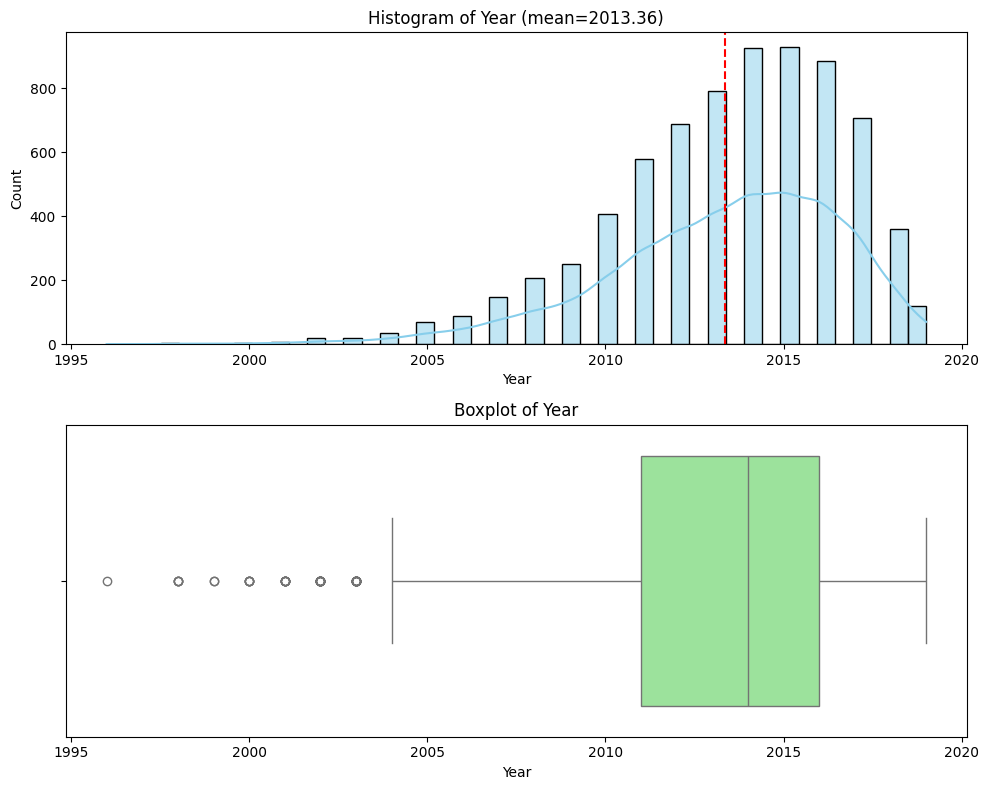

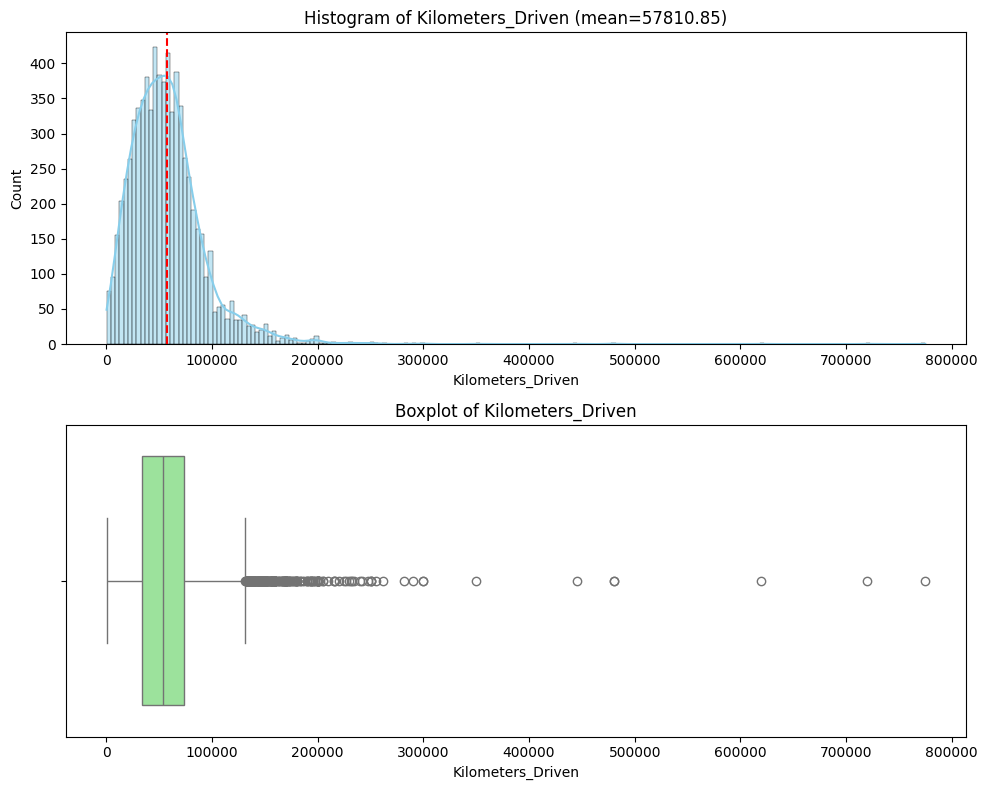

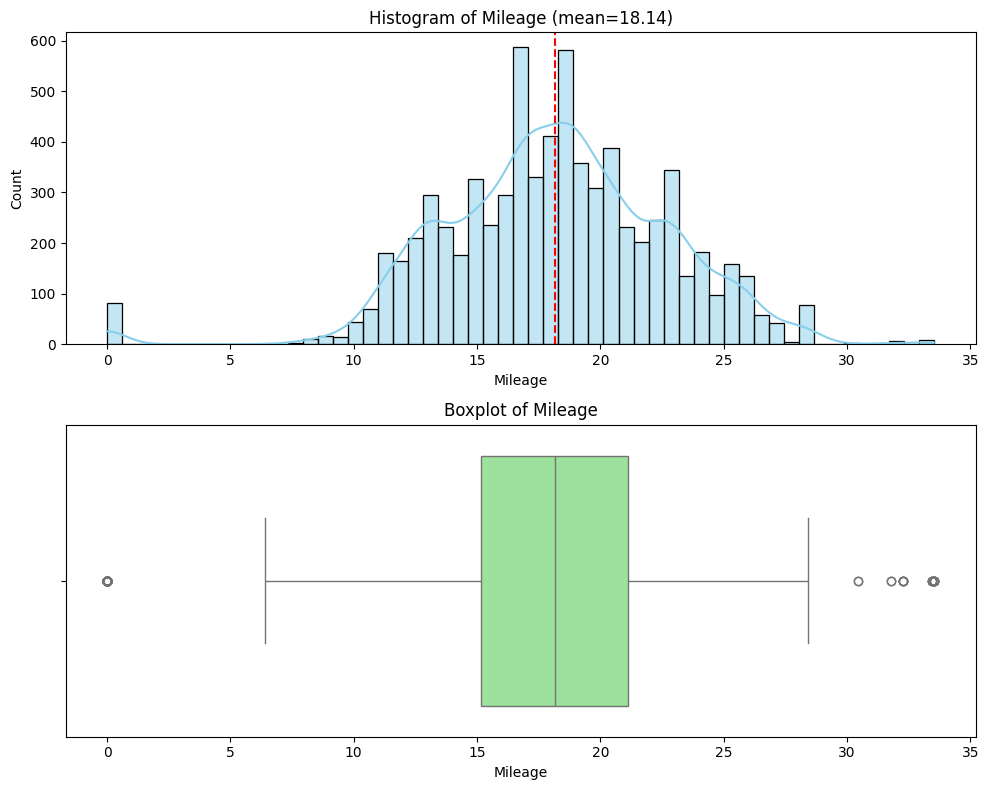

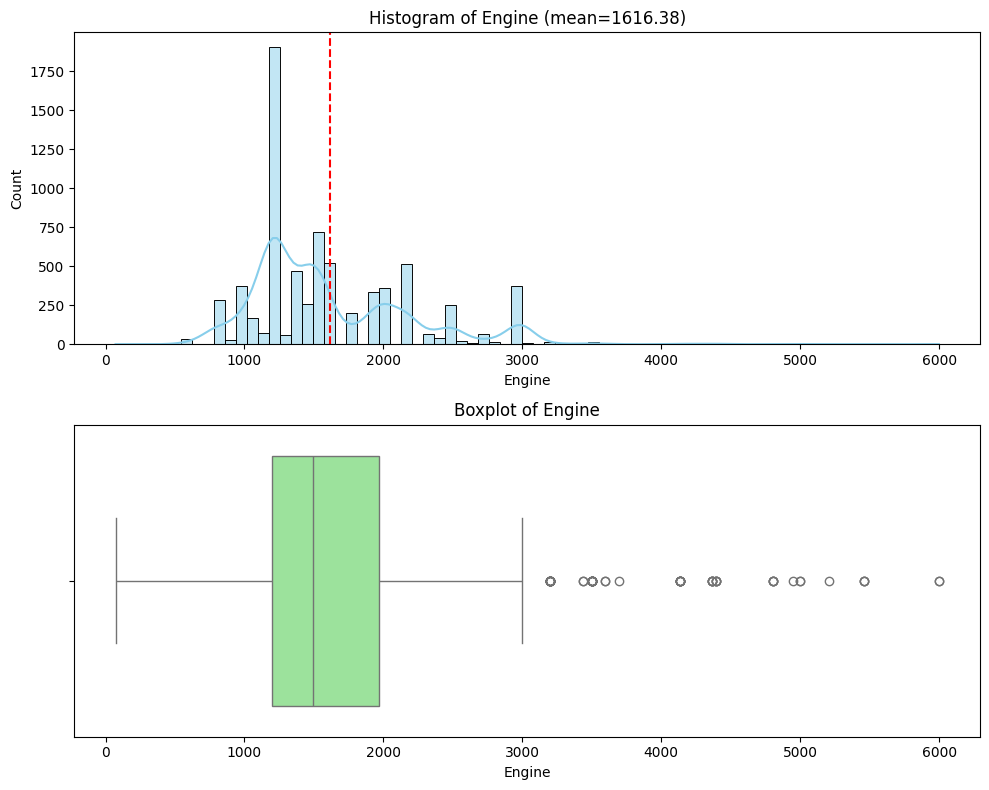

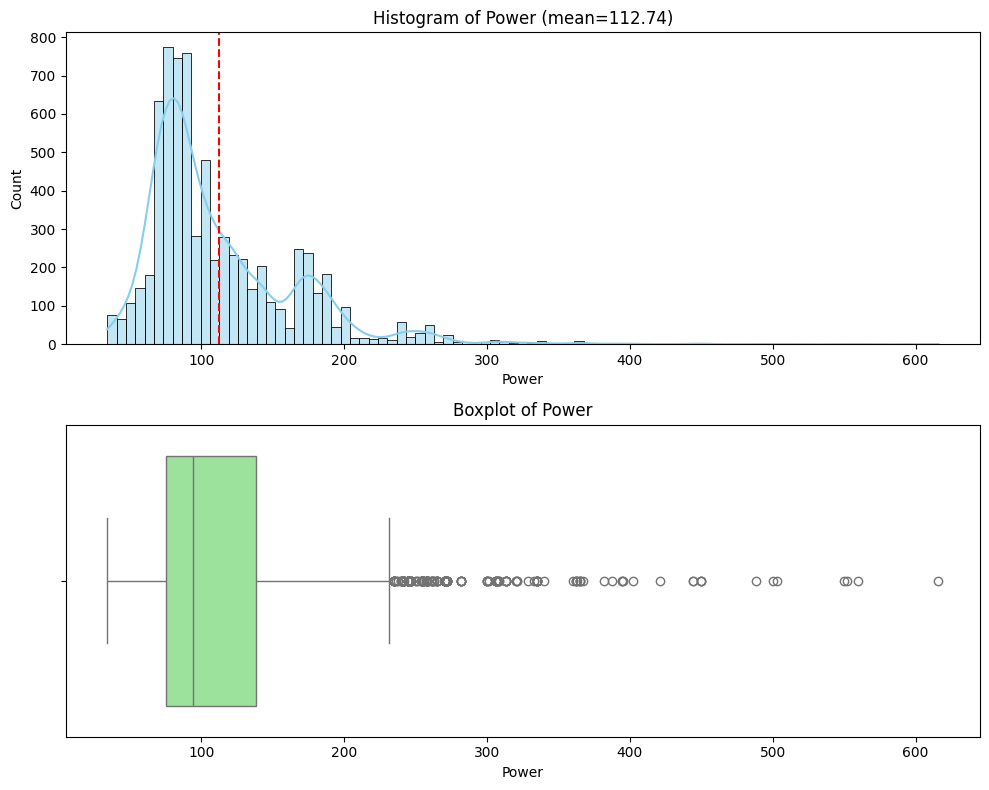

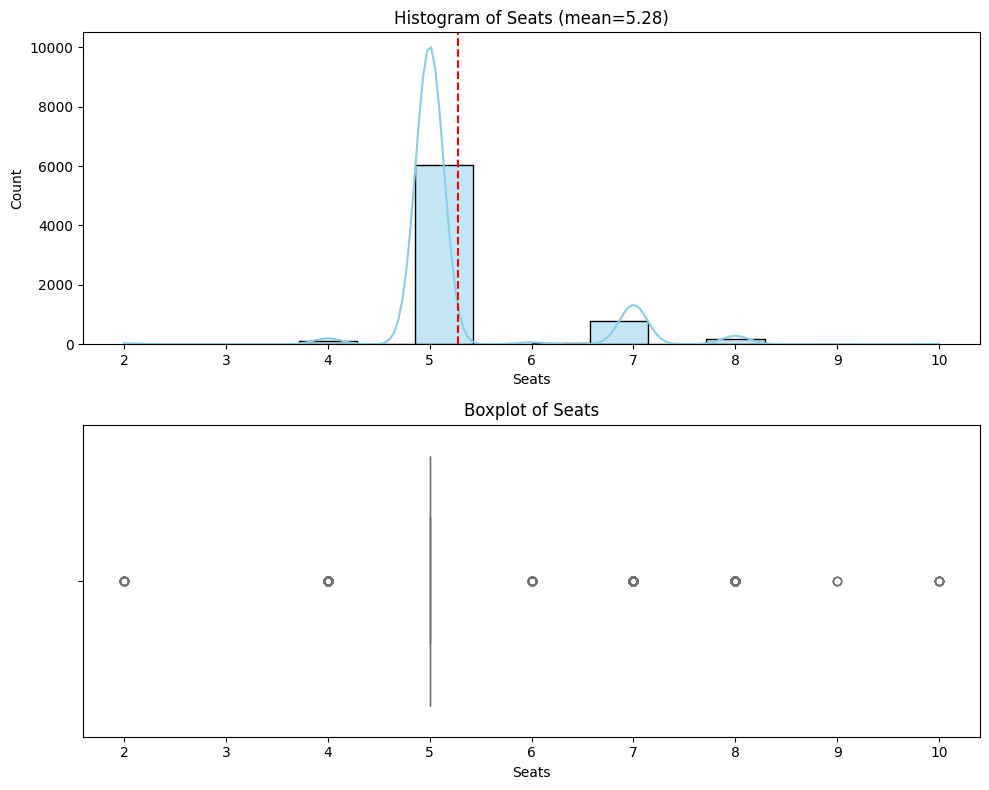

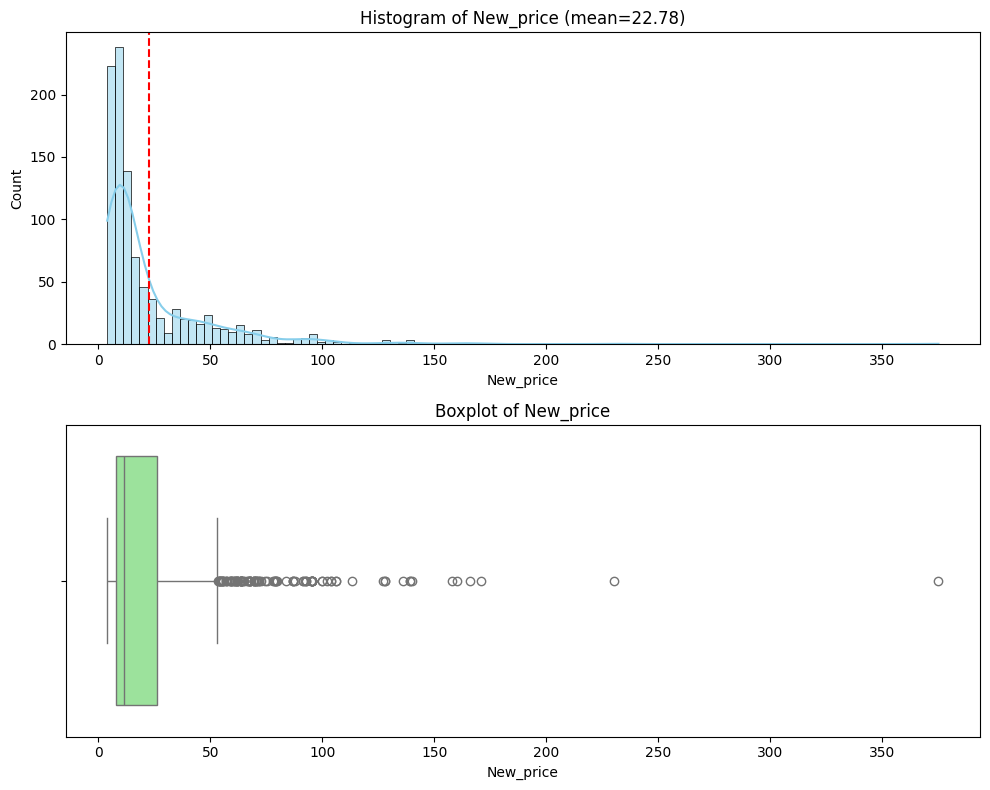

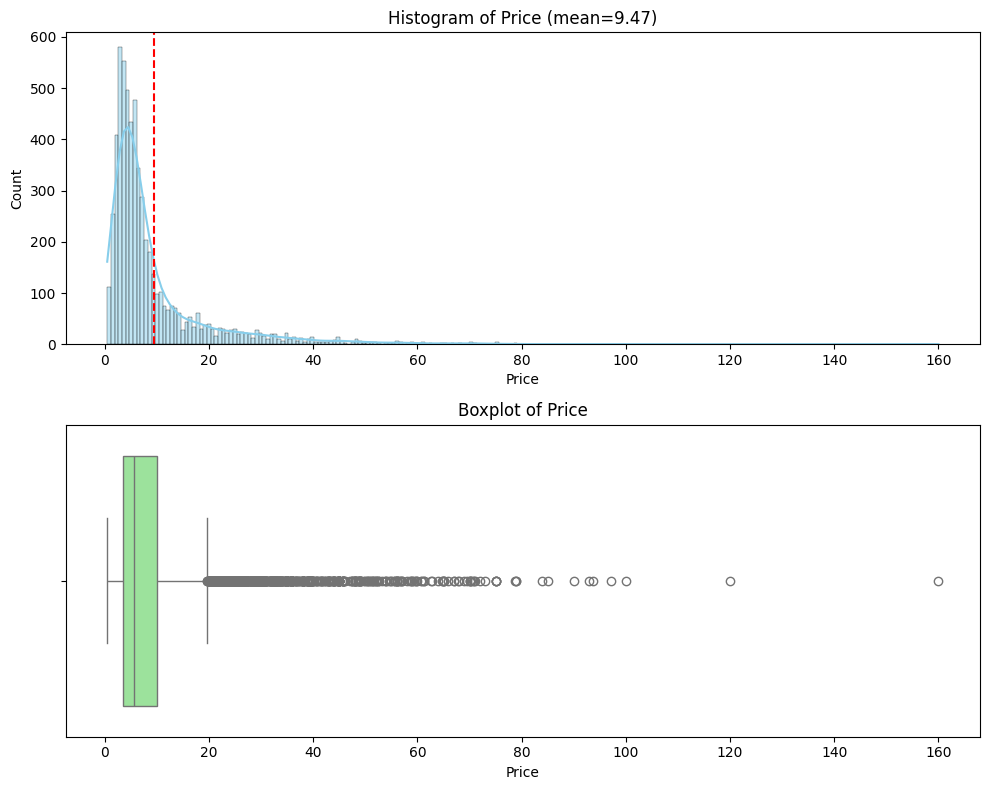


Univariate Analysis for Categorical Variables


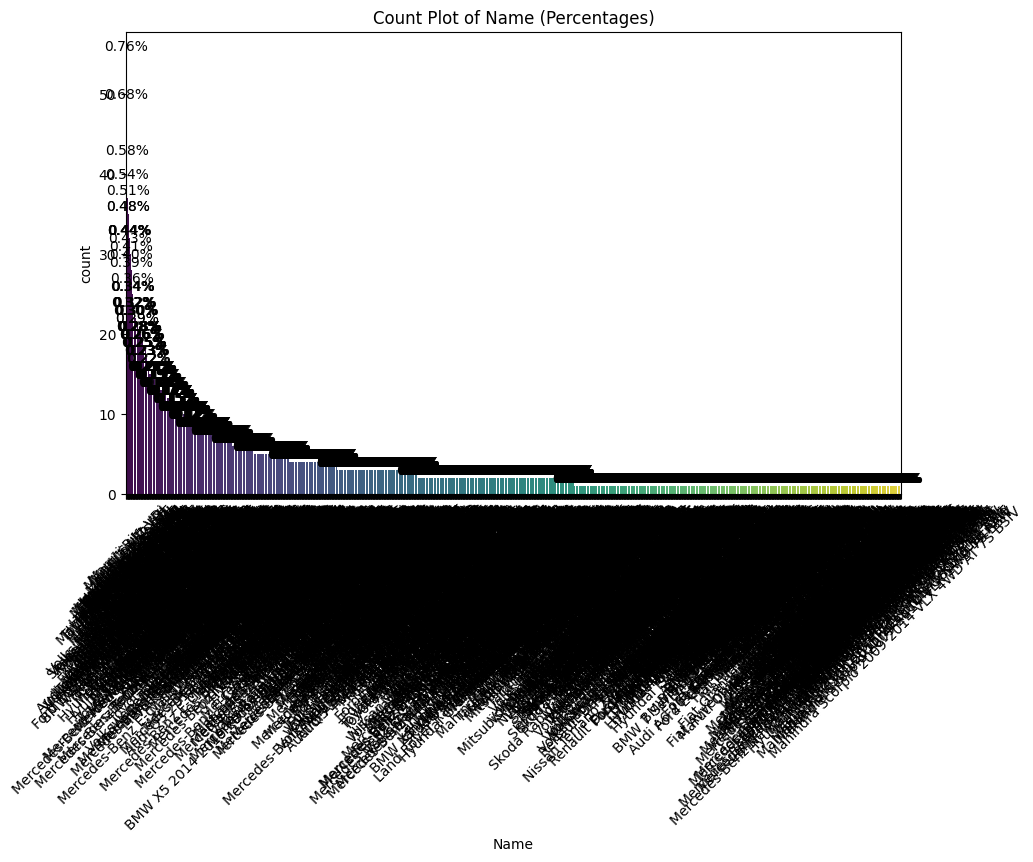

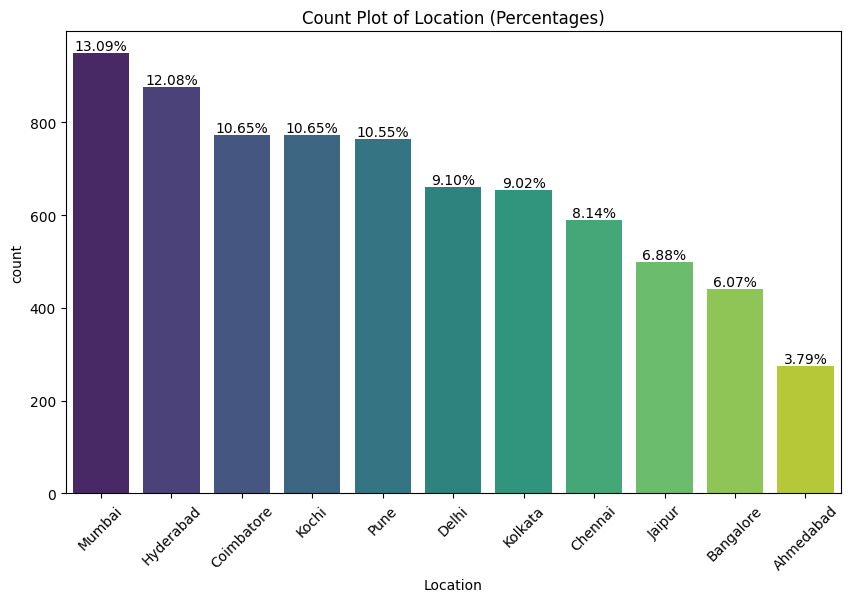

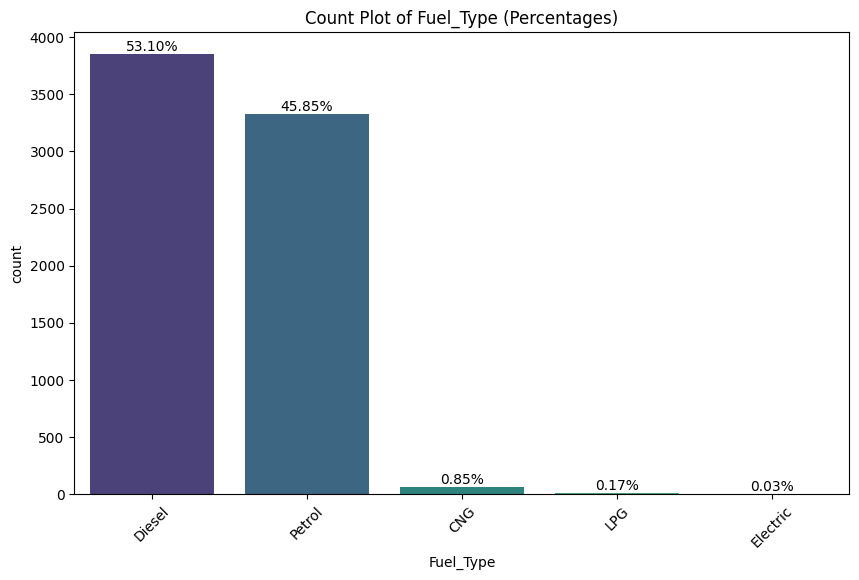

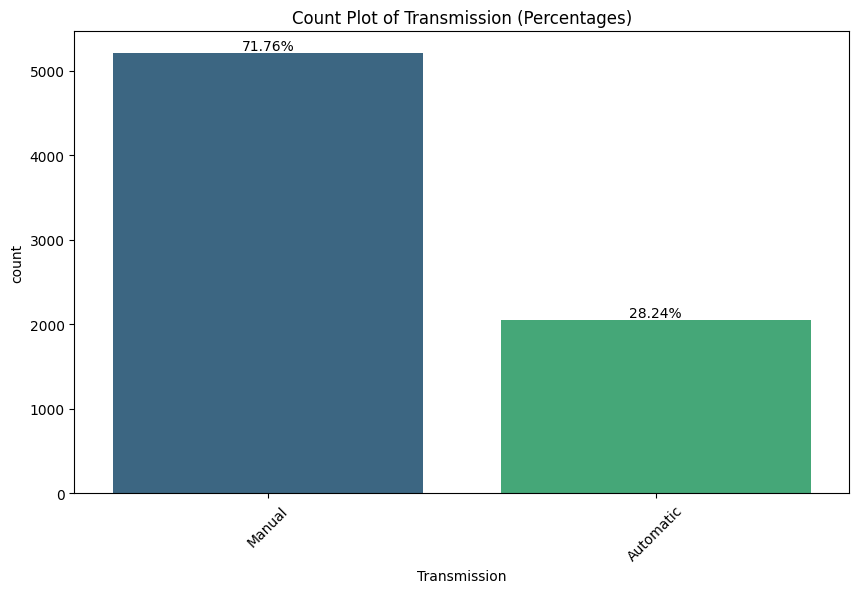

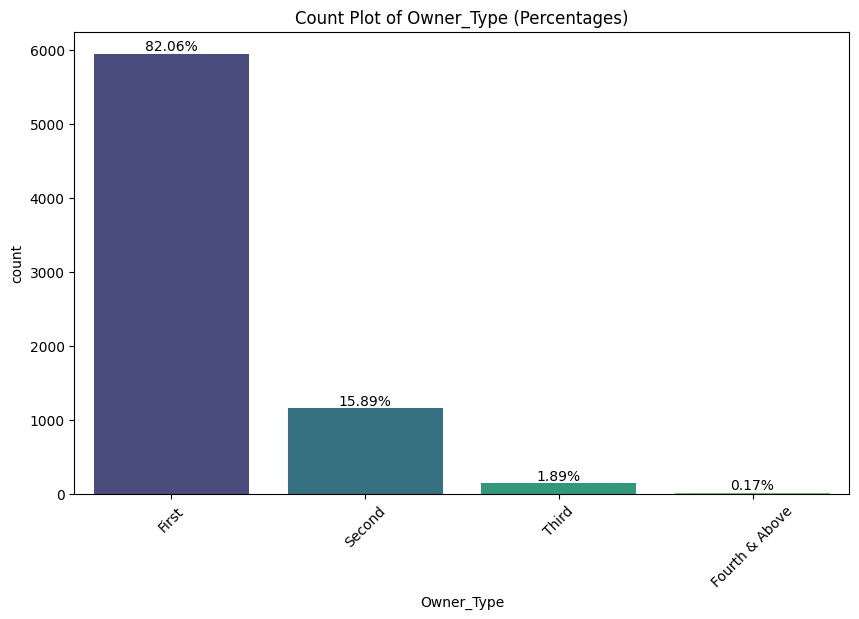

In [18]:
perform_univariate_analysis(df)

## Observations and Insights

### Owner Type

- The vast majority of cars are listed as first-owner vehicles, which indicates that most people sell their cars without it changing hands multiple times.
- Very few cars are sold by third owners or above, which might suggest either people tend to keep cars for longer, or that such cars are less desirable in the second-hand market.

### Transmission

- There is a significant preference for manual transmission over automatic in the used car market. This could be due to the cost difference or possibly the driving preference in the given location.

### Fuel Type

- Diesel and petrol vehicles dominate the market, which is typical for the Indian car market where these two fuel types are most common.
- There are very few CNG, LPG, and electric cars available. This might reflect the overall market distribution of these fuel types, or possibly a lack of demand in the second-hand market.

### Location

- Mumbai, Hyderabad, and Coimbatore have the highest number of used cars for sale, indicating either a higher demand or a higher turnover of cars in these cities.
- There's a substantial drop in the number of used cars available in cities like Bangalore and Ahmedabad, which could suggest a lower supply or possibly more new car sales in these areas.

### Price

- The price of used cars is right-skewed, with a few cars priced significantly higher than the average. The mean price might be influenced by these outliers.
- The boxplot indicates several outliers, which could be luxury cars or cars that are priced unusually high due to other factors like brand, model, or additional features.

### New Price

- The `New_price` variable also shows a right-skewed distribution, indicating that new prices vary widely, likely due to the wide range of car models available.
- Like the used prices, new prices also show outliers, which could be due to premium models or editions.

### Seats

- Most cars have 5 seats, which is standard for sedans and hatchbacks. There are fewer options for cars with a higher seating capacity, like SUVs or minivans.

### Power and Engine

- Both power and engine capacity distributions are right-skewed, with some high-performance cars driving the mean upwards.
- There are outliers in both categories, suggesting the presence of high-performance or luxury cars that deviate from the general trend.

### Mileage

- The mileage of cars seems to follow a normal distribution with a mean around 18.14 kmpl, which is common for city driving conditions.
- The boxplot for mileage doesn't show many outliers, which indicates that extreme values are not common for this variable.

### Kilometers Driven

- The histogram shows a right-skewed distribution for `Kilometers_Driven`, with most cars having driven a moderate number of kilometers, while fewer cars show very high mileage. The skewness indicates that while most cars have been driven standard distances for used cars, a few cars have exceptionally high values, which may be outliers or may represent very old cars.
- The average (mean) kilometers driven is around 57,810 km, which falls within what one might expect for used cars that are still in demand.
- The boxplot reveals a number of outliers on the higher end, which indicates that some cars have driven significantly more than the average. These outliers may need to be investigated to ensure they are not data entry errors and do not skew the predictive model.

### Year

- The histogram for the `Year` the cars were made shows that the majority of cars being sold are relatively new, with a peak around the years 2010 to 2018. There are fewer cars from the early 2000s and even fewer from the 1990s, which makes sense given the wear and tear on older cars and their gradual removal from the market.
- The average year of the cars is around 2013, suggesting that most used cars are between 5 and 10 years old.
- The boxplot doesn’t show many outliers, indicating that the distribution of the car years doesn't have extreme values that are significantly older than the rest.

### General Insights

- The used car market seems to consist mainly of cars that are within a 5 to 10-year age range. This could reflect a trend where owners are more likely to sell their cars while they still hold a significant resale value.
- High `Kilometers_Driven` may negatively affect the car's value, as it can imply greater wear and tear. It will be important for the pricing model to account for this factor.
- The age of the car (`Year`) is a critical variable as well, as it can significantly impact the price. Newer cars are likely to sell for more than older ones, all else being equal.
- Any pricing model will need to handle outliers in both `Kilometers_Driven` and `Year` carefully to avoid distorted predictions.

- There's a need to closely investigate the high-value outliers across the different numerical variables as they could be luxury cars or rare models that could skew the model predictions.
- The prevalence of manual, diesel, and petrol cars in the dataset suggests that these categories will be important factors in predicting the used car prices.
- The distribution of cars across cities could be influenced by local economic conditions, urban density, and the popularity of car ownership.


In [19]:
import numpy as np

# Apply log transformation to 'Kilometers_Driven'
df["Log_Kilometers_Driven"] = np.log(df["Kilometers_Driven"] + 1)  # Adding 1 to avoid log(0)

# Apply log transformation to 'Price'
df["Log_Price"] = np.log(df["Price"] + 1)  # Adding 1 to avoid log(0)

# Since 'New_Price' might contain NaNs or zeros, handle them accordingly before log transformation
# For simplicity, let's replace NaNs with zeros and then apply log transformation
df["New_price"] = df["New_price"].replace(np.nan, 0)
df["Log_New_Price"] = np.log(df["New_price"] + 1)  # Adding 1 to avoid log(0) and log(nan)

# Check the transformed features
print(df[["Log_Kilometers_Driven", "Log_Price", "Log_New_Price"]].head())

   Log_Kilometers_Driven  Log_Price  Log_New_Price
0              11.184435   1.011601       0.000000
1              10.621352   2.602690       0.000000
2              10.736418   1.704748       2.262804
3              11.373675   1.945910       0.000000
4              10.613271   2.930660       0.000000


## **Bivariate Analysis**


**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?


Correlation matrix for log-transformed features:
                        Log_Price  Log_New_Price  Log_Kilometers_Driven  \
Log_Price               1.000000       0.273813              -0.204466   
Log_New_Price           0.273813       1.000000              -0.234991   
Log_Kilometers_Driven  -0.204466      -0.234991               1.000000   
Year                    0.472968       0.294433              -0.502784   
Engine                  0.700099       0.081950               0.151282   
Power                   0.786133       0.157101               0.016715   
Seats                   0.157071       0.017891               0.190252   

                           Year    Engine     Power     Seats  
Log_Price              0.472968  0.700099  0.786133  0.157071  
Log_New_Price          0.294433  0.081950  0.157101  0.017891  
Log_Kilometers_Driven -0.502784  0.151282  0.016715  0.190252  
Year                   1.000000 -0.055076  0.013011  0.007925  
Engine                -0.055076  1.00

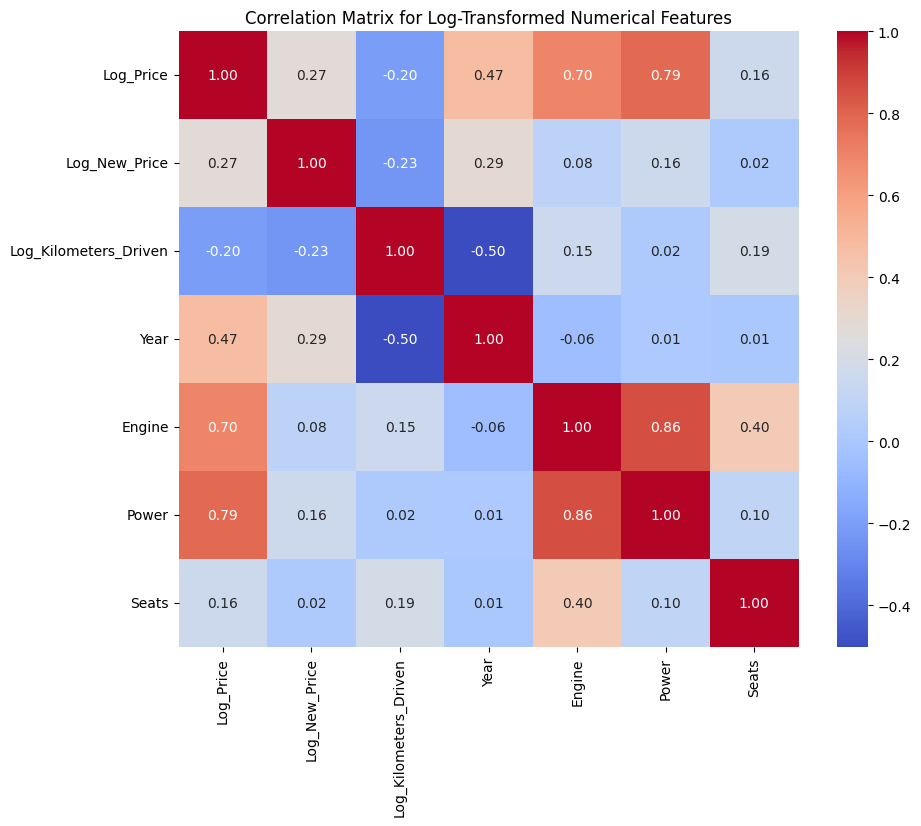

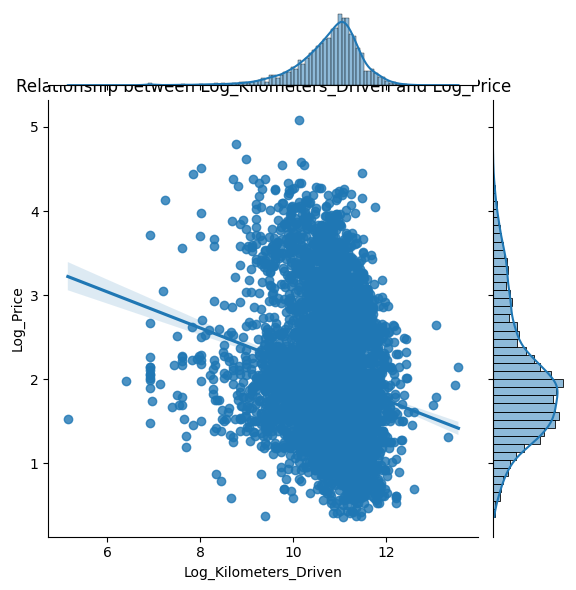

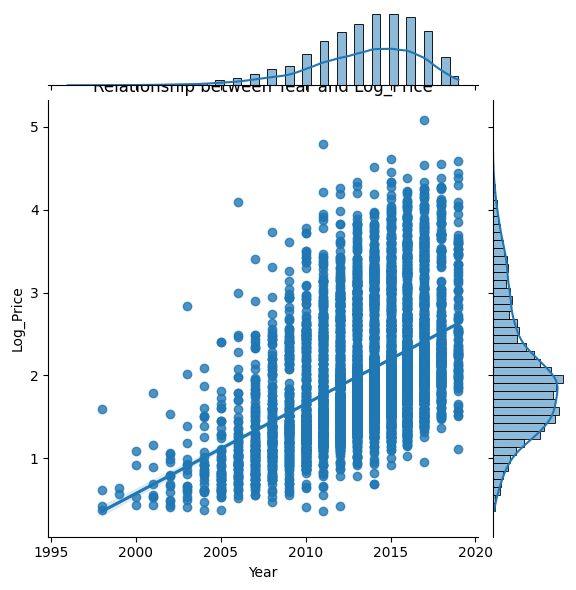

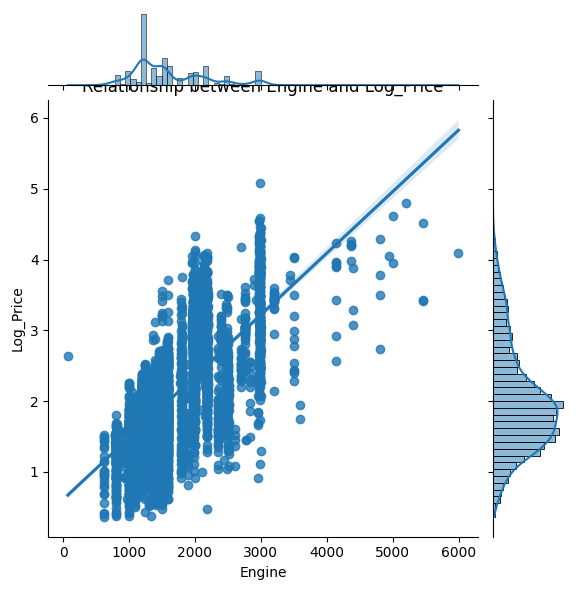

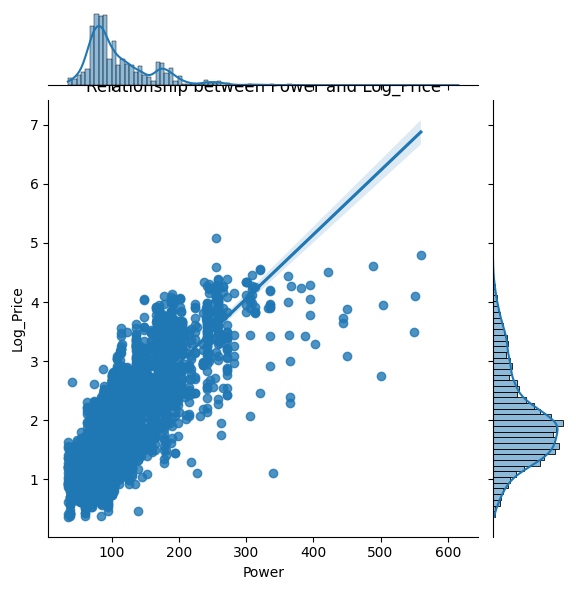

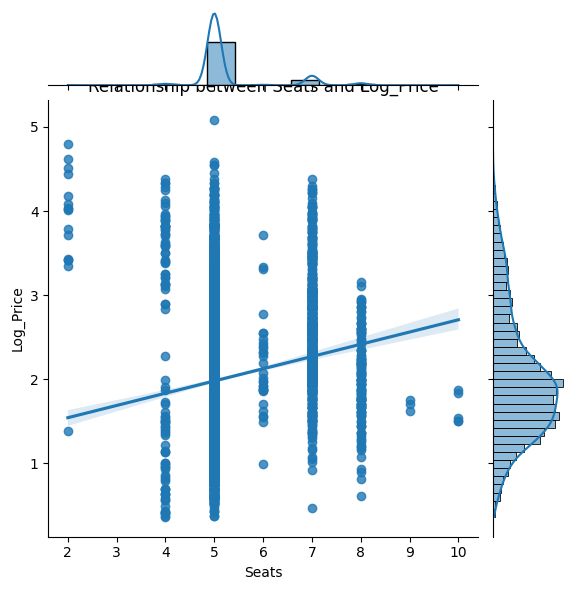

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame and we're excluding the non-log transformed 'Price' and 'Kilometers_Driven'
log_numerical_features = [
    "Log_Price",
    "Log_New_Price",
    "Log_Kilometers_Driven",
    # Add other numerical features as needed that are not the non-log-transformed versions
]
# Include other relevant numerical features
log_numerical_df = df[log_numerical_features + ["Year", "Engine", "Power", "Seats"]]

# Calculate the correlation matrix for log-transformed numerical features and other relevant features
corr_matrix_log = log_numerical_df.corr()

# Display the correlation matrix in text
print("Correlation matrix for log-transformed features:\n", corr_matrix_log)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_log, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Log-Transformed Numerical Features")
plt.show()


# Method to explore relations among variables using pair plots or scatter plots
def explore_relationships(df, features, target):
    for feature in features:
        if feature != target:
            sns.jointplot(x=feature, y=target, data=df, kind="reg")
            plt.title(f"Relationship between {feature} and {target}")
            plt.show()


# Example usage:
# Select features that make sense for bivariate analysis with the target 'Log_Price'
relevant_features_log = [
    "Log_Kilometers_Driven",
    # Include other relevant log-transformed or numerical features
    "Year",
    "Engine",
    "Power",
    "Seats",
]
explore_relationships(df, relevant_features_log, "Log_Price")

## Observation and Insights

The provided correlation matrix and scatter plots for the log-transformed variables give us valuable insights into how different features relate to the log-transformed `Price` of the used cars, as well as their relationships with each other.

### Observations from the Correlation Matrix:

- **Log_Price and Power/Engine**: There is a strong positive correlation between `Log_Price` and `Power`, as well as `Log_Price` and `Engine`. This suggests that cars with more powerful engines tend to have higher prices.
- **Log_Price and Year**: There is a moderate positive correlation between `Log_Price` and `Year`, indicating that newer cars are generally priced higher than older cars.
- **Log_Kilometers_Driven and Year**: There's a significant negative correlation between `Log_Kilometers_Driven` and `Year`, showing that older cars tend to have higher mileage.
- **Engine and Power**: As expected, there's a very strong positive correlation between `Engine` and `Power`, which is logical since larger engines often produce more power.

### Observations from the Scatter Plots:

- The scatter plot between `Log_Kilometers_Driven` and `Log_Price` demonstrates the negative correlation where cars with higher mileage tend to have lower prices.
- `Year` has a clear positive trend with `Log_Price`, confirming that newer cars are priced higher.
- There's a strong positive linear relationship between `Engine` size and `Log_Price`, as well as between `Power` and `Log_Price`, suggesting these are significant factors in predicting the price of a used car.
- The `Seats` variable seems to have a weaker and more scattered relationship with `Log_Price`, suggesting that the number of seats alone may not be a strong predictor of car price.

### Insights and Recommendations:

- **Modeling**: When building a predictive model, `Power` and `Engine` should be considered as important features due to their strong relationship with `Log_Price`.
- **Multicollinearity**: Given the high correlation between `Engine` and `Power`, multicollinearity might be a concern for regression models. Depending on the model, it may be necessary to only include one of these variables or to apply dimensionality reduction techniques such as PCA.
- **Mileage Adjustment**: Since higher mileage significantly lowers a car's value, models should account for this by considering `Log_Kilometers_Driven` as a key feature.
- **Feature Engineering**: The year of manufacture (Year) could be transformed into a feature that captures the car's age, which may be more meaningful for the model.
- **Outliers**: Scatter plots indicate the presence of outliers, especially in `Log_Price`. These should be handled carefully, potentially by capping or removal, to avoid skewing the model.

The analysis indicates that while some features show a clear relationship with the price of used cars, other features might not be as informative on their own. However, they could still contribute valuable information when used in combination with other features within a comprehensive predictive model.


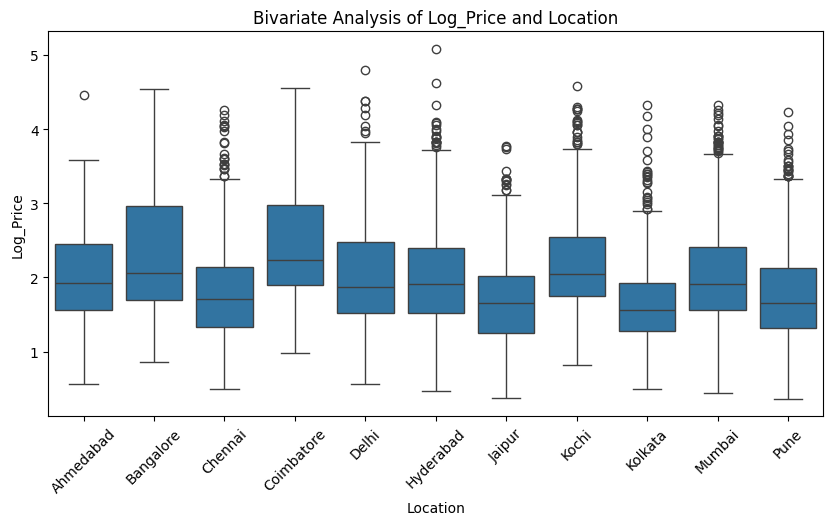

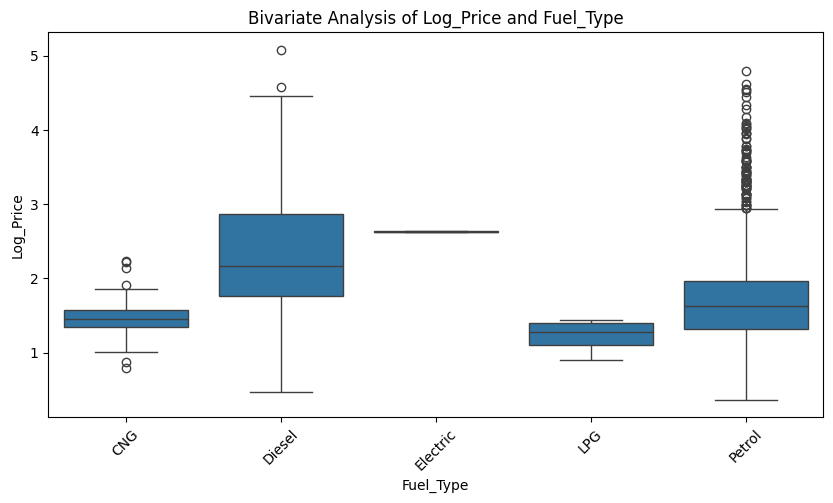

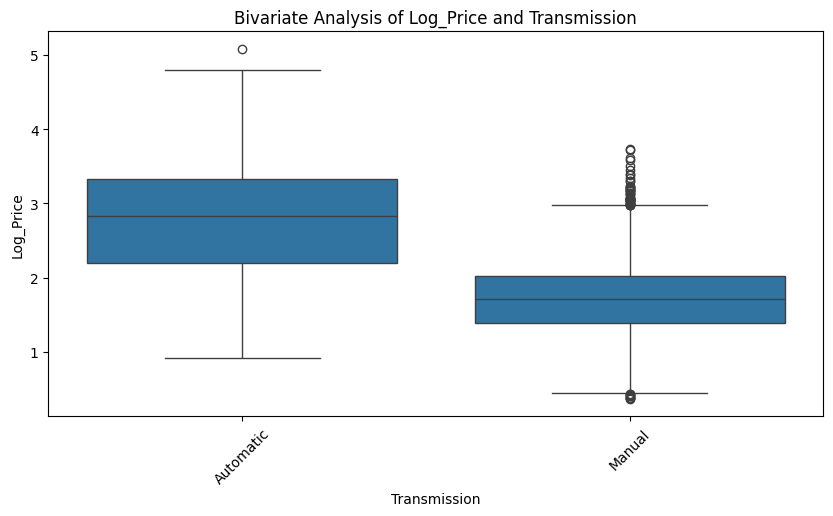

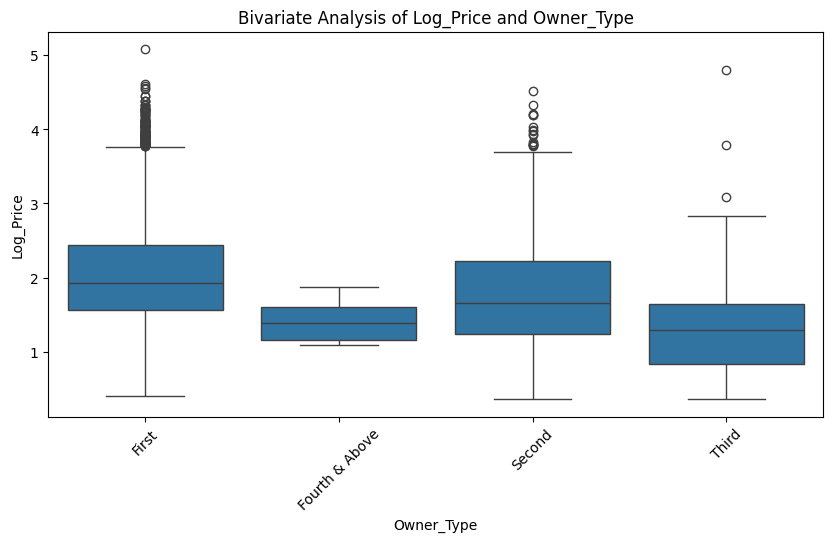

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Log_Price' is the column with the log-transformed prices

# List of categorical variables to analyze
categorical_variables = ["Location", "Fuel_Type", "Transmission", "Owner_Type"]

# For each categorical variable, plot a boxplot against Log_Price
for cat_var in categorical_variables:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=cat_var, y="Log_Price", data=df)
    plt.title(f"Bivariate Analysis of Log_Price and {cat_var}")
    plt.xticks(rotation=45)  # Rotate x labels for better readability if needed
    plt.show()

## Observation and insights

### Location and Log_Price:

- There is noticeable variability in `Log_Price` based on the location. This suggests that location is a significant factor in used car pricing, which could be due to economic factors, local demand, and supply.
- Some cities show a wider range of prices (e.g., Mumbai, Coimbatore), indicating a diverse market with a mix of budget and premium options.

### Fuel Type and Log_Price:

- Diesel cars tend to have a higher median log price compared to petrol, which might reflect the higher initial cost or perceived durability and fuel efficiency of diesel vehicles.
- Electric cars have a smaller spread and higher median log price, though the sample size looks limited. This could be due to the novelty and less depreciation of electric vehicles.

### Transmission and Log_Price:

- Automatic cars have a higher median log price than manual cars, suggesting a premium attached to the convenience of automatic transmission.
- The spread for manual cars indicates a wide range in the quality and brand of manual transmission cars in the market.

### Owner Type and Log_Price:

- First-owner cars have the highest median log price, which is expected as they are likely newer and less used.
- There’s a clear trend of decreasing median log price with an increasing number of owners, with fourth & above having the lowest median price, indicating the cumulative wear and depreciation associated with multiple ownerships.

### Insights:

- **Marketing Strategy**: Businesses could focus on cities with higher price variability to capitalize on both ends of the market.
- **Inventory Management**: Since automatic and diesel cars fetch higher prices, stocking up on these could be beneficial, though this must be balanced against demand and supply dynamics.
- **Customer Segmentation**: The preference for newer, first-owner cars could be leveraged for targeted marketing, while also offering competitive options for buyers looking for lower-cost, older vehicles.

### Recommendations for Data Preprocessing:

- **Outliers**: There are numerous outliers, especially in the `Log_Price` distribution across different categories. While these could represent real market conditions, they should be examined to ensure they're not due to data errors.
- **Encoding Categorical Data**: These categorical variables should be appropriately encoded before being used in a predictive model. Location has many categories and might benefit from target encoding, while other nominal categories could be one-hot encoded.
- **Handling Sparse Categories**: For categories like `Electric` in `Fuel_Type` with very few observations, consider grouping into an "Other" category to prevent overfitting.


### **Feature Engineering**


**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?


- **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.


In [22]:
# Assuming 'df' is your DataFrame and 'Name' is the column with car names

# Create a new column 'Brand' by extracting the first word of 'Name'
df["Brand"] = df["Name"].apply(lambda x: x.split()[0])

# Create a new column 'Model' by extracting the second word or more of 'Name' (optional)
df["Model"] = df["Name"].apply(lambda x: " ".join(x.split()[1:]) if len(x.split()) > 1 else "Unknown")

# Now, let's check the number of unique brands and models
print(f"Unique brands: {df['Brand'].nunique()}")
print(f"Unique models: {df['Model'].nunique()}")

# Inspect the first few entries to confirm it looks okay
print(df[["Name", "Brand", "Model"]].head())

Unique brands: 33
Unique models: 2041
                               Name    Brand                       Model
0            Maruti Wagon R LXI CNG   Maruti             Wagon R LXI CNG
1  Hyundai Creta 1.6 CRDi SX Option  Hyundai    Creta 1.6 CRDi SX Option
2                      Honda Jazz V    Honda                      Jazz V
3                 Maruti Ertiga VDI   Maruti                  Ertiga VDI
4   Audi A4 New 2.0 TDI Multitronic     Audi  A4 New 2.0 TDI Multitronic


In [23]:
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame

# 1. Log Transformation
for col in ["Price", "Kilometers_Driven", "Power", "Engine"]:
    df[f"Log_{col}"] = np.log1p(df[col])

# 2. Brand and Model Extraction
df["Brand"] = df["Name"].apply(lambda x: x.split()[0])
df["Model"] = df["Name"].apply(lambda x: " ".join(x.split()[1:]))

# 3. Handling Outliers - Capping at the 99th percentile for example
for col in ["Log_Price", "Log_Power", "Log_Engine", "Log_Kilometers_Driven"]:
    percentile_99 = df[col].quantile(0.99)
    df[col] = np.where(df[col] > percentile_99, percentile_99, df[col])

# 4. One-Hot Encoding
categorical_vars = ["Location", "Fuel_Type", "Transmission", "Owner_Type"]
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Drop the original columns that were transformed or encoded
df.drop(["Name", "Price", "Kilometers_Driven", "Power", "Engine"], axis=1, inplace=True)

# Check the transformed DataFrame
df.head()

,Year,Mileage,Seats,New_price,Log_Kilometers_Driven,Log_Price,Log_New_Price,Brand,Model,Log_Power,Log_Engine,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,26.60,5.0,0.00,11.184435,1.011601,0.000000,Maruti,Wagon R LXI CNG,4.080246,6.906755,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1,2015,19.67,5.0,0.00,10.621352,2.602690,0.000000,Hyundai,Creta 1.6 CRDi SX Option,4.845761,7.367077,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
2,2011,18.20,5.0,8.61,10.736418,1.704748,2.262804,Honda,Jazz V,4.496471,7.090077,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
3,2012,20.77,7.0,0.00,11.373675,1.945910,0.000000,Maruti,Ertiga VDI,4.497139,7.130099,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
4,2013,15.20,5.0,0.00,10.613271,2.930660,0.000000,Audi,A4 New 2.0 TDI Multitronic,4.954418,7.585281,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False


In [24]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Create a new column for car age
df["Car_Age"] = current_year - df["Year"]

# Now you can drop the original 'Year' column as it's redundant
df.drop("Year", axis=1, inplace=True)

In [25]:
df.head()

,Mileage,Seats,New_price,Log_Kilometers_Driven,Log_Price,Log_New_Price,Brand,Model,Log_Power,Log_Engine,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Car_Age
0,26.60,5.0,0.00,11.184435,1.011601,0.000000,Maruti,Wagon R LXI CNG,4.080246,6.906755,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,14
1,19.67,5.0,0.00,10.621352,2.602690,0.000000,Hyundai,Creta 1.6 CRDi SX Option,4.845761,7.367077,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,9
2,18.20,5.0,8.61,10.736418,1.704748,2.262804,Honda,Jazz V,4.496471,7.090077,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,13
3,20.77,7.0,0.00,11.373675,1.945910,0.000000,Maruti,Ertiga VDI,4.497139,7.130099,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,12
4,15.20,5.0,0.00,10.613271,2.930660,0.000000,Audi,A4 New 2.0 TDI Multitronic,4.954418,7.585281,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,11


### **Missing value treatment**


In [26]:
def treat_missing_values(df):
    # Get the list of numerical and categorical columns
    numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
    categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

    # Treat numerical columns
    for col in numerical_cols:
        # Replace NaNs with the median value of the column
        df[col].fillna(df[col].median(), inplace=True)

    # Treat categorical columns
    for col in categorical_cols:
        # Replace NaNs with the mode (most frequent value) of the column
        df[col].fillna(df[col].mode()[0], inplace=True)

    return df


# Apply the function to your dataframe
df = treat_missing_values(df)

In [27]:
df.head()

,Mileage,Seats,New_price,Log_Kilometers_Driven,Log_Price,Log_New_Price,Brand,Model,Log_Power,Log_Engine,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Car_Age
0,26.60,5.0,0.00,11.184435,1.011601,0.000000,Maruti,Wagon R LXI CNG,4.080246,6.906755,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,14
1,19.67,5.0,0.00,10.621352,2.602690,0.000000,Hyundai,Creta 1.6 CRDi SX Option,4.845761,7.367077,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,9
2,18.20,5.0,8.61,10.736418,1.704748,2.262804,Honda,Jazz V,4.496471,7.090077,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,13
3,20.77,7.0,0.00,11.373675,1.945910,0.000000,Maruti,Ertiga VDI,4.497139,7.130099,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,12
4,15.20,5.0,0.00,10.613271,2.930660,0.000000,Audi,A4 New 2.0 TDI Multitronic,4.954418,7.585281,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,11


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Mileage                    7252 non-null   float64 
 1   Seats                      7252 non-null   float64 
 2   New_price                  7252 non-null   float64 
 3   Log_Kilometers_Driven      7252 non-null   float64 
 4   Log_Price                  7252 non-null   float64 
 5   Log_New_Price              7252 non-null   float64 
 6   Brand                      7252 non-null   object  
 7   Model                      7252 non-null   category
 8   Log_Power                  7252 non-null   float64 
 9   Log_Engine                 7252 non-null   float64 
 10  Location_Bangalore         7252 non-null   bool    
 11  Location_Chennai           7252 non-null   bool    
 12  Location_Coimbatore        7252 non-null   bool    
 13  Location_Delhi             7252 non-nu

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?


## **Building Various Models**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.


### **Split the Data**


<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.


**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?


In [29]:
from sklearn.model_selection import train_test_split

# Define the features (all columns except for Log_Price) and the target variable (Log_Price)
X = df.drop("Log_Price", axis=1)
y = df["Log_Price"]

# Convert categorical variables into dummy/indicator variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into a training set and a test set
# 70% of the data for training and 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (5076, 2098)
Test set shape: (2176, 2098)


For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            "MAE": np.mean(np.abs(y_test - y_pred)),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "R2": r2_score(y_test, y_pred),
        }

        # Feature importance for tree-based models
        if hasattr(model, "feature_importances_"):
            feature_importance = model.feature_importances_
            results[name]["Feature_Importance"] = feature_importance
        elif hasattr(model, "coef_"):
            results[name]["Feature_Importance"] = model.coef_

    return results

In [32]:
def plot_feature_importance(importance, feature_names, top_n=20):
    # Create DataFrame using feature importance and names
    importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance})

    # Sort features according to importance
    importance_df = importance_df.sort_values(by="Importance", ascending=False).head(top_n)

    # Create a bar plot using seaborn for a nicer look
    plt.figure(figsize=(10, 8))
    sns.barplot(x="Importance", y="Feature", data=importance_df)

    # Set the plot title and labels
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")

    # Show the plot
    plt.show()

In [33]:
def display_results(results):
    results_df = pd.DataFrame(results).T
    return results_df

In [34]:
def plot_results(results):
    # Create DataFrame from results
    results_df = pd.DataFrame(results).T

    # Normalizing the R2 score for better visualization
    # If R2 is unexpectedly large (likely due to an error), set it to NaN
    results_df["R2"] = results_df["R2"].apply(lambda x: x if -1 <= x <= 1 else None)

    # Separate the R2 scores for independent scaling
    r2_scores = results_df.pop("R2")

    # Plot MAE and RMSE
    ax = results_df.sort_values(by="MAE").plot(kind="bar", figsize=(10, 6), use_index=True)

    # Plot R2 scores on a second axis
    ax2 = ax.twinx()
    r2_scores.sort_values(ascending=False).plot(kind="line", marker="o", ax=ax2, color="g", linewidth=2)

    # Annotating the actual R2 score on the plot
    for i, val in enumerate(r2_scores.sort_values(ascending=False)):
        if pd.notnull(val):  # Only annotate if the value is not NaN
            ax2.text(i, val, f"{val:.2f}", fontsize=8, va="bottom")

    # Setting the axis labels and title
    ax.set_ylabel("MAE/RMSE")
    ax2.set_ylabel("R2 Score")
    ax.set_title("Model Performance Comparison")

    # Show legend for both axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc="upper left")

    plt.show()

In [35]:
# Define the models you want to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
}

In [36]:
results = train_and_evaluate(models, X_train, X_test, y_train, y_test)

In [37]:
# Display the results
results_df = display_results(results)
results_df

,MAE,RMSE,R2,Feature_Importance
Linear Regression,97714166.73837,1377176390.146092,-4064336171370630144.0,"[-0.0033472018450080945, -0.10497054771763342,..."
Ridge,0.205186,0.310163,0.793847,"[-0.0074505839499080856, 0.004258551038646711,..."
Lasso,0.484147,0.66108,0.063476,"[-0.0, 0.0, 0.011047685822959424, -0.0, 0.0, 0..."
Decision Tree,0.261797,0.419786,0.622371,"[0.02474321324725366, 0.0027744929800082316, 0..."
Random Forest,0.210763,0.316703,0.785061,"[0.021734655589598372, 0.00497415548364769, 0...."


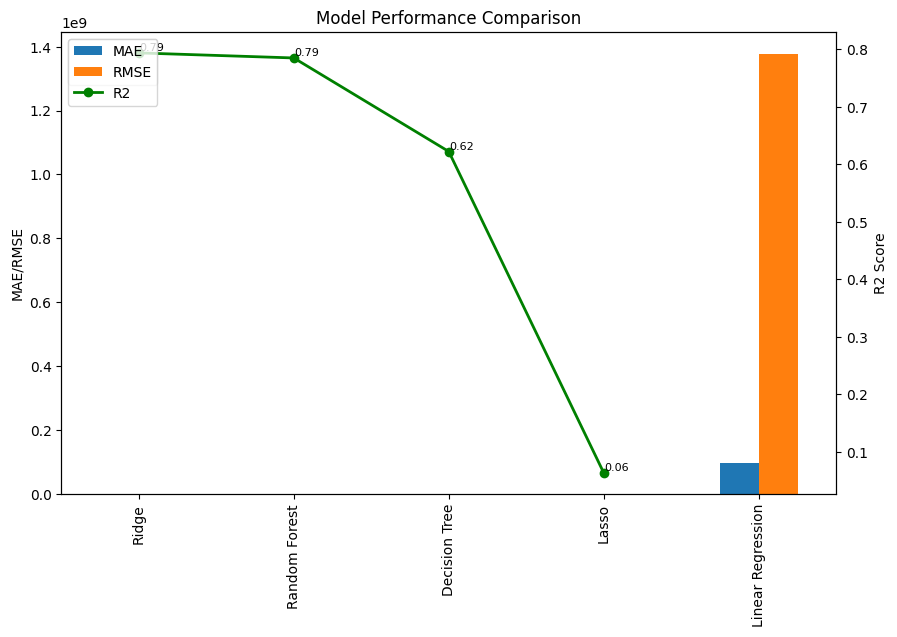

In [38]:
# Plot the results
plot_results(results)

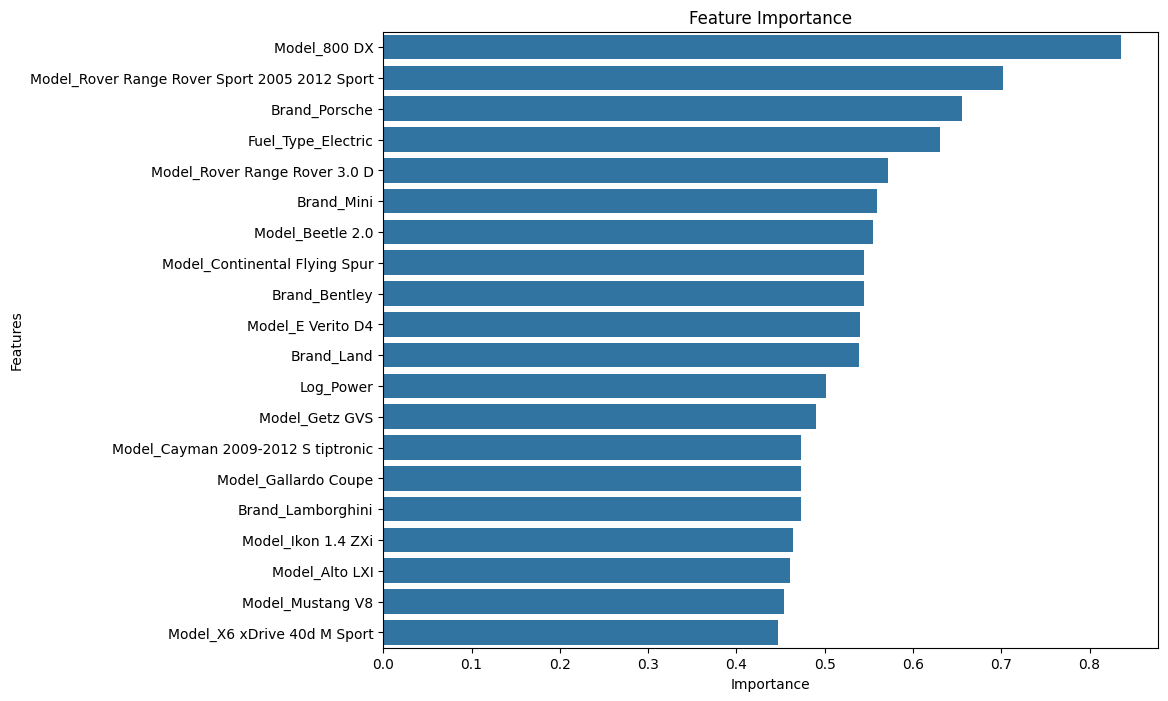

In [39]:
# Find the name of the best model based on the R2 score
best_model_name = max(results, key=lambda k: results[k]["R2"])

# Get the feature importance from the best model's results
best_features_importance = results[best_model_name].get("Feature_Importance", None)

# If feature importance is not None, then plot it using the adapted method
if best_features_importance is not None:
    # Call the improved feature importance plot method
    plot_feature_importance(best_features_importance, X_train.columns, top_n=20)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd


def train_and_evaluate(models, hyperparameters, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        print(f"Training and evaluating model: {name}")
        if name in hyperparameters:
            print(f"Performing GridSearchCV on {name} with all CPUs...")
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=hyperparameters[name],
                scoring="neg_mean_squared_error",
                cv=5,
                n_jobs=-1,  # Use all CPUs
                verbose=1,
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            print(f"Best parameters for {name}: {grid_search.best_params_}")
        else:
            best_model = model.fit(X_train, y_train)

        y_pred = best_model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

        if hasattr(best_model, "feature_importances_"):
            feature_importance = best_model.feature_importances_
            results[name]["Feature_Importance"] = feature_importance
        elif hasattr(best_model, "coef_"):
            results[name]["Feature_Importance"] = best_model.coef_

        print(f"Completed model: {name}\n")

    return results

In [41]:
# Define hyperparameter grids to search for each model
hyperparameters = {
    "Ridge": {
        "alpha": [0.001, 0.01, 0.1, 1, 10, 100],
        "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
    },
    "Lasso": {
        "alpha": [0.001, 0.01, 0.1, 1, 10, 100],
        "max_iter": [1000, 5000, 10000],
        "selection": ["cyclic", "random"],
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 15, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": [None, "auto", "sqrt", "log2"],
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["auto", "sqrt", "log2"],
        "bootstrap": [True, False],
    },
}

# The models dictionary remains the same
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
}

In [42]:
results = train_and_evaluate(models, hyperparameters, X_train, X_test, y_train, y_test)

Training and evaluating model: Linear Regression
Completed model: Linear Regression

Training and evaluating model: Ridge
Performing GridSearchCV on Ridge with all CPUs...
Fitting 5 folds for each of 42 candidates, totalling 210 fits


/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

Best parameters for Ridge: {'alpha': 10, 'solver': 'sparse_cg'}
Completed model: Ridge

Training and evaluating model: Lasso
Performing GridSearchCV on Lasso with all CPUs...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Lasso: {'alpha': 0.001, 'max_iter': 10000, 'selection': 'random'}
Completed model: Lasso

Training and evaluating model: Decision Tree
Performing GridSearchCV on Decision Tree with all CPUs...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters for Decision Tree: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Completed model: Decision Tree

Training and evaluating model: Random Forest
Performing GridSearchCV on Random Forest with all CPUs...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
C

In [43]:
# Display the results
results_df = display_results(results)
results_df

,MAE,RMSE,R2,Feature_Importance
Linear Regression,97714166.73837,1377176390.146092,-4064336171370630144.0,"[-0.0033472018450080945, -0.10497054771763342,..."
Ridge,0.211479,0.30445,0.801371,"[-0.009864717914353182, 0.005666797361721755, ..."
Lasso,0.223779,0.314426,0.788141,"[-0.010590245476335332, 0.013198156068549748, ..."
Decision Tree,0.262475,0.359233,0.723457,"[0.00639455961246916, 0.001859881588406036, 0...."
Random Forest,0.225614,0.31552,0.786664,"[0.05209948496414763, 0.017679322868269166, 0...."


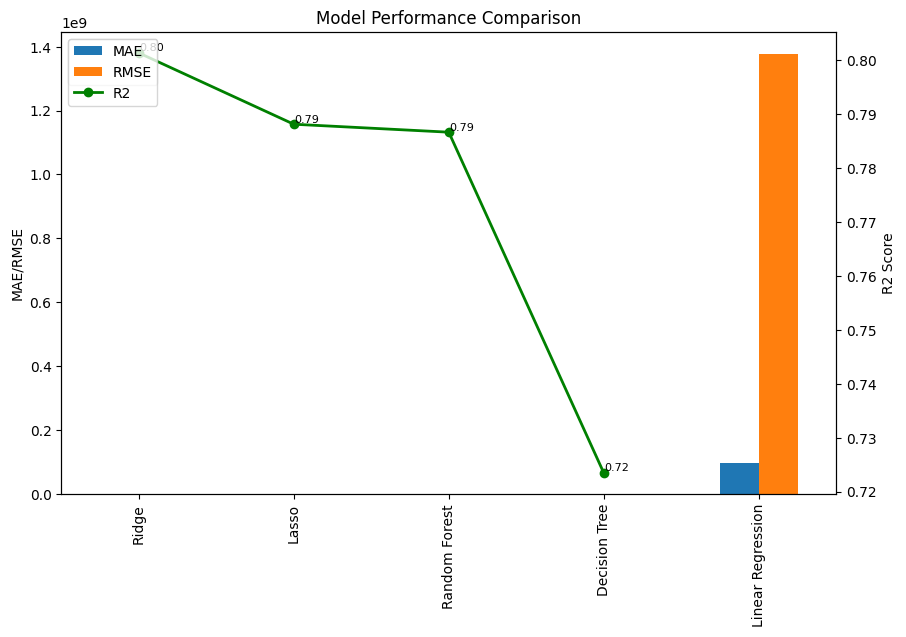

In [44]:
# Plot the results
plot_results(results)

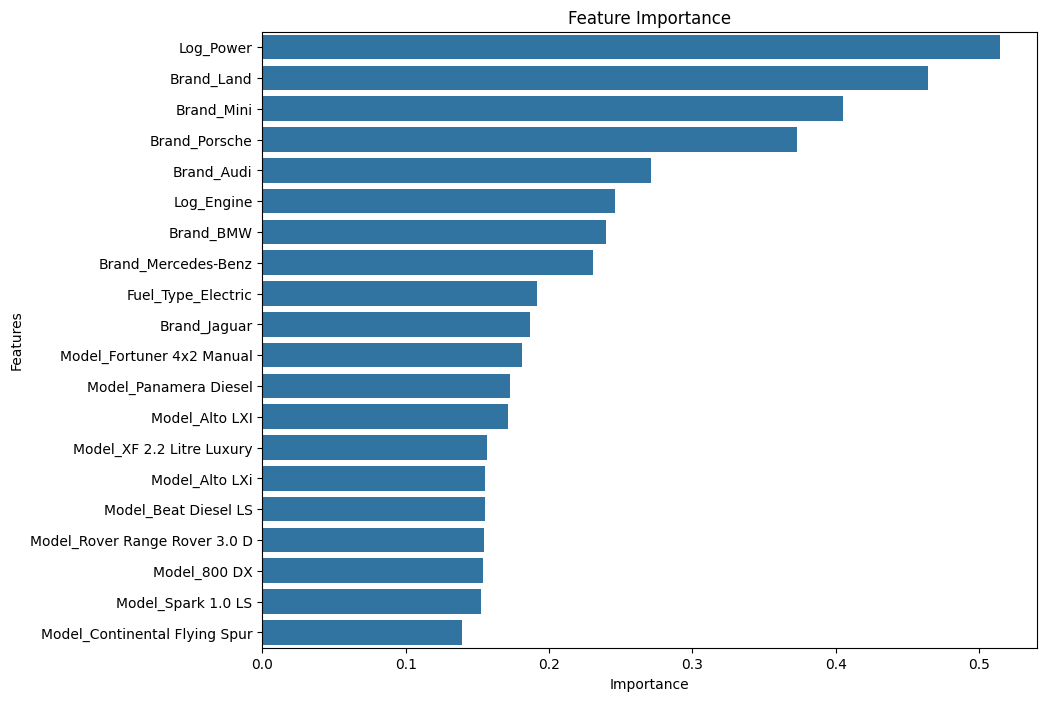

In [45]:
# Find the name of the best model based on the R2 score
best_model_name = max(results, key=lambda k: results[k]["R2"])

# Get the feature importance from the best model's results
best_features_importance = results[best_model_name].get("Feature_Importance", None)

# If feature importance is not None, then plot it using the adapted method
if best_features_importance is not None:
    # Call the improved feature importance plot method
    plot_feature_importance(best_features_importance, X_train.columns, top_n=20)

In [46]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Ensure all data are of a numeric type
X_vif = X_train.select_dtypes(include=[np.number])

# Optionally, handle NaN values by imputation or removal
# For example, you can fill NaNs with the median value of each column
X_vif = X_vif.fillna(X_vif.median())

# Add a constant term for the intercept
X_vif = add_constant(X_vif)

# Check for and remove any infinite values
X_vif = X_vif.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display the VIF for each feature
print(vif_data.sort_values(by="VIF", ascending=False))

                 Feature          VIF
0                  const  1289.209585
7             Log_Engine     6.507083
6              Log_Power     5.562554
5          Log_New_Price     3.333561
3              New_price     3.283223
1                Mileage     1.877521
8                Car_Age     1.707353
2                  Seats     1.605698
4  Log_Kilometers_Driven     1.517165


In [47]:
# Drop 'Log_Power' and 'New_price' from your DataFrame
X_vif_reduced = X_vif.drop(["Log_Power", "New_price"], axis=1)

# Recalculate VIFs
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_vif_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_vif_reduced.values, i) for i in range(X_vif_reduced.shape[1])]

# Display the VIF for each feature after removal
print(vif_data_reduced.sort_values(by="VIF", ascending=False))

                 Feature          VIF
0                  const  1076.877213
1                Mileage     1.834191
5             Log_Engine     1.804539
6                Car_Age     1.667247
3  Log_Kilometers_Driven     1.508093
2                  Seats     1.270505
4          Log_New_Price     1.134860


In [48]:
# First, ensure that 'y' has the same index alignment as 'X_vif_reduced'
# This step is crucial if any preprocessing on 'X_vif_reduced' resulted in row removals
from sklearn.model_selection import train_test_split

y_aligned = y.reindex(X_vif_reduced.index)

# Now you can safely perform the train-test split

X_train_reduced, X_test_reduced, y_new_train, y_new_test = train_test_split(
    X_vif_reduced.drop(["const"], axis=1),  # Drop 'const' column if present
    y_aligned,  # Use the reindexed 'y'
    test_size=0.3,
    random_state=42,
)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train_reduced, y_new_train)

# Predict on the training and testing sets
y_train_pred = lr_model.predict(X_train_reduced)
y_test_pred = lr_model.predict(X_test_reduced)

# Calculate and print the performance metrics
print("Linear Regression Model Performance:")
print("===================================")
print(f"Train R2 Score: {r2_score(y_new_train, y_train_pred):.4f}")
print(f"Test R2 Score: {r2_score(y_new_test, y_test_pred):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_new_train, y_train_pred)):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_new_test, y_test_pred)):.4f}")

Linear Regression Model Performance:
Train R2 Score: 0.6264
Test R2 Score: 0.6507
Train RMSE: 0.4103
Test RMSE: 0.4025


In [52]:
results_reduced = train_and_evaluate(models, hyperparameters, X_train_reduced, X_test_reduced, y_new_train, y_new_test)

Training and evaluating model: Linear Regression
Completed model: Linear Regression

Training and evaluating model: Ridge
Performing GridSearchCV on Ridge with all CPUs...
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters for Ridge: {'alpha': 1, 'solver': 'saga'}
Completed model: Ridge

Training and evaluating model: Lasso
Performing GridSearchCV on Lasso with all CPUs...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Lasso: {'alpha': 0.001, 'max_iter': 1000, 'selection': 'random'}
Completed model: Lasso

Training and evaluating model: Decision Tree
Performing GridSearchCV on Decision Tree with all CPUs...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters for Decision Tree: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Completed model: Decision Tree

Training and evaluating model: Random Forest
Performing GridSearchCV on Random Forest with all CPUs...
Fitt

In [53]:
# Display the results
results_reduced_df = display_results(results_reduced)
results_reduced_df

,MAE,RMSE,R2,Feature_Importance
Linear Regression,0.301728,0.402536,0.650671,"[-0.012639508873677, -0.1228155564851763, -0.0..."
Ridge,0.301844,0.402688,0.650407,"[-0.012896394294360123, -0.12218332776309385, ..."
Lasso,0.30194,0.402942,0.649967,"[-0.01319229699074428, -0.11973433183156008, -..."
Decision Tree,0.277157,0.379311,0.689818,"[0.0074140851698812895, 0.029856325810465063, ..."
Random Forest,0.243685,0.345975,0.741945,"[0.12653876357482557, 0.03638052587378148, 0.0..."


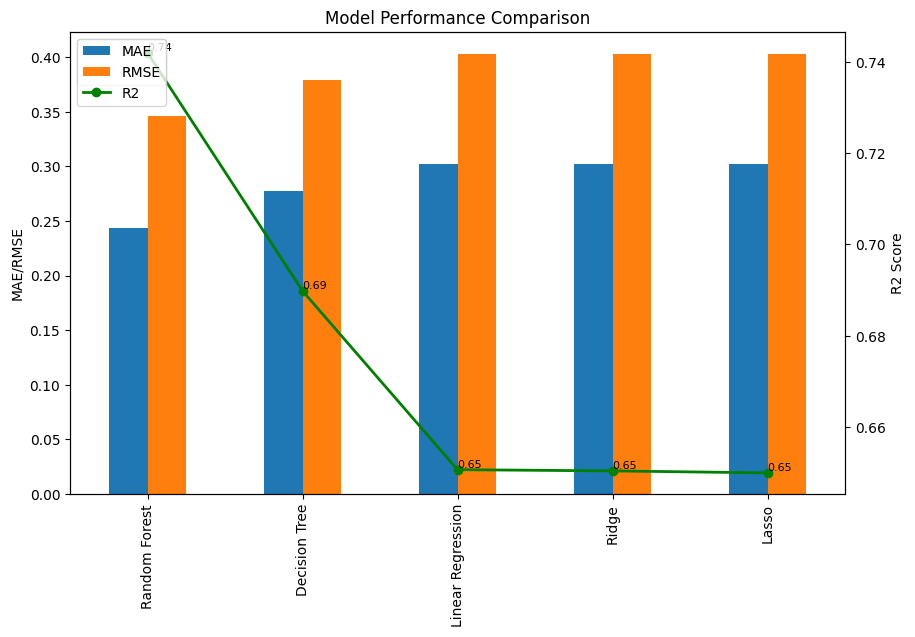

In [54]:
plot_results(results_reduced)

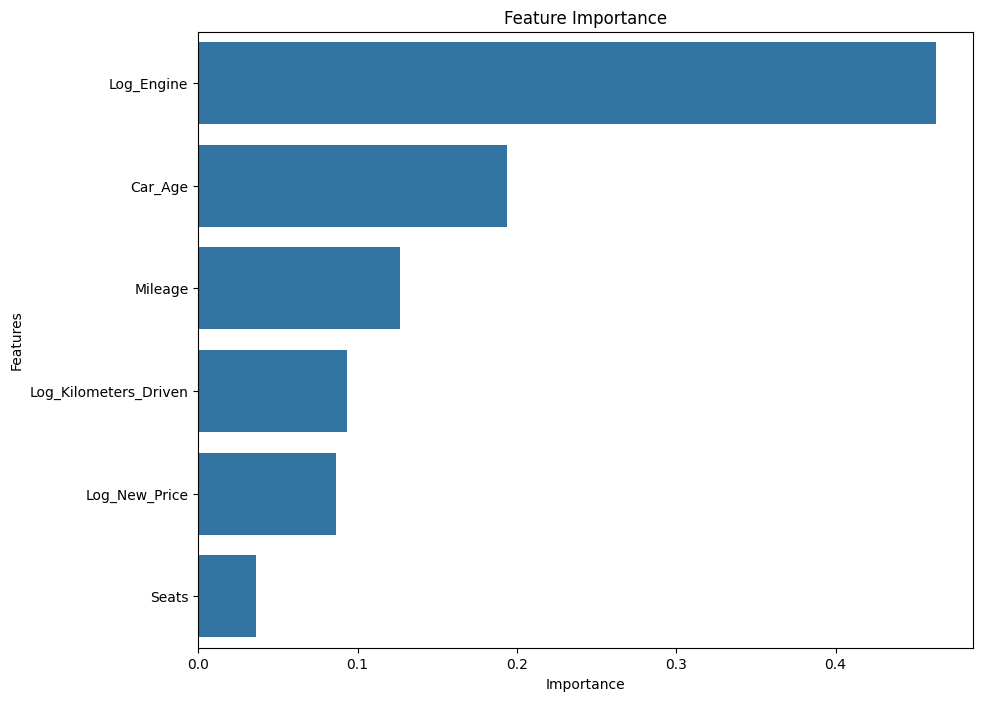

In [55]:
# Find the name of the best model based on the R2 score
best_model_reduced_name = max(results_reduced, key=lambda k: results_reduced[k]["R2"])

# Get the feature importance from the best model's results
best_features_reduced_importance = results_reduced[best_model_reduced_name].get("Feature_Importance", None)

# If feature importance is not None, then plot it using the adapted method
if best_features_reduced_importance is not None:
    # Call the improved feature importance plot method
    plot_feature_importance(best_features_reduced_importance, X_train_reduced.columns, top_n=20)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (5076, 2098)
Test set shape: (2176, 2098)


In [57]:
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
}

results_no_linear_regression = train_and_evaluate(models, hyperparameters, X_train, X_test, y_train, y_test)

Training and evaluating model: Ridge
Performing GridSearchCV on Ridge with all CPUs...
Fitting 5 folds for each of 42 candidates, totalling 210 fits


/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

Best parameters for Ridge: {'alpha': 10, 'solver': 'sparse_cg'}
Completed model: Ridge

Training and evaluating model: Lasso
Performing GridSearchCV on Lasso with all CPUs...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Lasso: {'alpha': 0.001, 'max_iter': 1000, 'selection': 'random'}
Completed model: Lasso

Training and evaluating model: Decision Tree
Performing GridSearchCV on Decision Tree with all CPUs...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters for Decision Tree: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Completed model: Decision Tree

Training and evaluating model: Random Forest
Performing GridSearchCV on Random Forest with all CPUs...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Co

In [58]:
results_no_linear_regression_df = display_results(results_no_linear_regression)
results_no_linear_regression_df

,MAE,RMSE,R2,Feature_Importance
Ridge,0.211479,0.30445,0.801371,"[-0.009864717914353182, 0.005666797361721755, ..."
Lasso,0.223783,0.314434,0.78813,"[-0.010601036075496109, 0.013192546353491092, ..."
Decision Tree,0.261773,0.356879,0.727069,"[0.007121830092294111, 0.001861074404922251, 0..."
Random Forest,0.224284,0.313884,0.788871,"[0.051315421099787886, 0.017311005804489264, 0..."


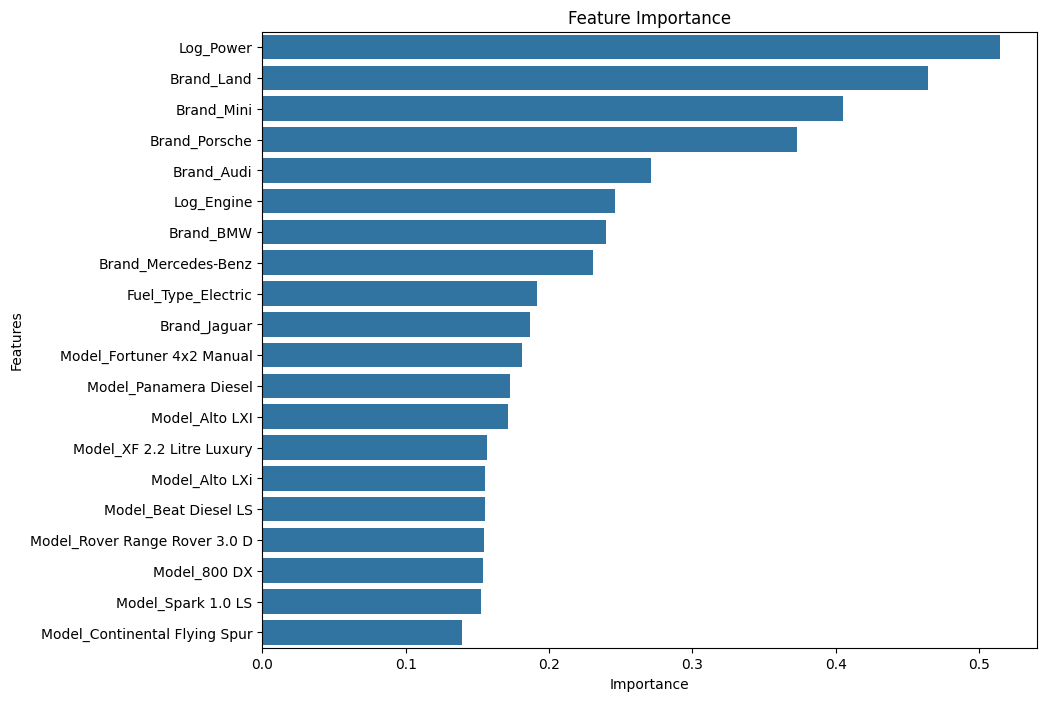

In [65]:
# Find the name of the best model based on the R2 score
best_model_name_no_linear_regression = max(
    results_no_linear_regression, key=lambda k: results_no_linear_regression[k]["R2"]
)

# Get the feature importance from the best model's results
best_features_importance_no_linear_regression = results_no_linear_regression[best_model_name_no_linear_regression].get(
    "Feature_Importance", None
)

# If feature importance is not None, then plot it using the adapted method
if best_features_importance_no_linear_regression is not None:
    # Call the improved feature importance plot method
    plot_feature_importance(best_features_importance_no_linear_regression, X_train.columns, top_n=20)

In [76]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


from sklearn.model_selection import RandomizedSearchCV


def tune_evaluate_xgboost(X_train, X_test, y_train, y_test):
    # Parameters to tune
    params = {
        "colsample_bytree": [0.3, 0.7],
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.05, 0.1],
        "alpha": [1, 10],
    }

    xgboost_model = xgb.XGBRegressor(objective="reg:squarederror", tree_method="hist")

    # Randomized search
    random_search = RandomizedSearchCV(
        estimator=xgboost_model,
        param_distributions=params,
        n_iter=10,  # Adjust this to search fewer/more parameter combinations
        scoring="neg_mean_squared_error",
        verbose=1,
        cv=3,
        n_jobs=-1,
    )

    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    print("Best parameters:", best_params)

    y_pred = random_search.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")

    return best_params, rmse, mae, r2

In [77]:
# Call the method with your data
best_params, rmse, mae, r2 = tune_evaluate_xgboost(X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.3, 'alpha': 1}
Root Mean Squared Error: 0.2967183096372023
Mean Absolute Error: 0.20420046315188417
R^2 Score: 0.8113315952484099


## **Conclusions and Recommendations**


### Conclusions:

1. **Model Selection**: Among the models you tested, XGBoost with the tuned parameters yielded the best performance in terms of R² and RMSE. This demonstrates the effectiveness of gradient boosting techniques for this type of regression problem and the benefit of hyperparameter tuning.

2. **Feature Engineering**: The process of handling multicollinearity by removing features like `Log_Power` and `New_Price` helped improve the performance of the linear models. However, tree-based models like XGBoost can inherently handle multicollinearity better, which could be why the final XGBoost model performed well even without this preprocessing step.

3. **Hyperparameter Tuning**: The results from the tuned XGBoost model suggest that careful selection of hyperparameters (e.g., `n_estimators`, `max_depth`, `learning_rate`, etc.) is crucial for model performance.

### Recommendations:

1. **Deployment**: The tuned XGBoost model can be considered for production to predict the prices of used cars. Ensure that the model's assumptions and feature preprocessing steps are well documented.

2. **Continuous Learning**: As more data becomes available, the model should be retrained to capture new trends in the used car market. Consider implementing an automated retraining pipeline if the data inflow is significant.

3. **Feature Importance**: Review the feature importance from the best-performing model to understand the driving factors behind used car prices. This can provide business insights and help in feature selection for any future models.

4. **Model Interpretability**: While XGBoost provides good performance, it can be seen as a 'black box'. Look into model interpretation frameworks like SHAP or LIME to help explain the predictions, enhancing trust and understanding for end-users.

5. **Model Monitoring**: After deployment, monitor the model's performance over time to catch any drift in data or degradation in performance, which might necessitate model updates or retraining.

6. **Expand Grid Search**: If resources allow, expand the grid search or use techniques like Bayesian optimization to explore a broader hyperparameter space.

7. **Alternative Models**: Continue experimenting with other advanced models and ensemble techniques that may yield better results, such as stacked ensembles or neural network-based models if the infrastructure allows.

8. **Pipeline Optimization**: Look into optimizing your data processing and model training pipeline to be more efficient, especially if you plan to scale up the data or model complexity.
